In [ ]:
!pip install deap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.6/135.6 kB 4.5 MB/s eta 0:00:00


In [ ]:
import numpy
import random

from deap import algorithms
from deap import tools
from deap import base
from deap import creator
from deap import benchmarks
from deap import cma

import matplotlib.pyplot as plt

In [ ]:
N = 2

creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)

toolbox = base.Toolbox()
toolbox.register("evaluate", benchmarks.rastrigin)

In [ ]:
def main():
    numpy.random.seed(128)

    records = []

    strategy = cma.Strategy(centroid=[5.0]*N, sigma=5.0, lambda_=20*N)
    toolbox.register("generate", strategy.generate, creator.Individual)
    toolbox.register("update", strategy.update)

    hof = tools.HallOfFame(1)
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", numpy.mean)
    stats.register("std", numpy.std)
    stats.register("min", numpy.min)
    stats.register("max", numpy.max)

    for gen in range(100):
      offspring = toolbox.generate()
      print(offspring)
      print(len(offspring))
      for ind in offspring:
        ind.fitness.values = toolbox.evaluate(ind)

      toolbox.update(offspring)
      hof.update(offspring)
      records.append(stats.compile(offspring))

    print(records)

    avgs = [record['avg'] for record in records]
    stds  = [record['std'] for record in records]
    mins  = [record['min'] for record in records]
    maxs  = [record['max'] for record in records]

    plt.plot(avgs, label='avg')
    plt.plot(stds, label='std')
    plt.plot(mins, label='min')
    plt.plot(maxs, label='max')
    plt.legend()
    plt.show()


[[np.float64(3.000005004022026), np.float64(8.095867874498843)], [np.float64(8.491717330564382), np.float64(-1.266402671287592)], [np.float64(7.295637219111734), np.float64(11.576248562626978)], [np.float64(1.0443240542530936), np.float64(3.277700972767829)], [np.float64(1.6324175800040286), np.float64(3.3530634135480546)], [np.float64(-2.2864258302000877), np.float64(7.991540309517561)], [np.float64(5.812596750975199), np.float64(-4.510300930684348)], [np.float64(6.706576758223004), np.float64(5.851222904101444)], [np.float64(6.521687918044382), np.float64(2.0681468174990454)], [np.float64(5.176522929100577), np.float64(6.451653162885222)], [np.float64(12.584110735464623), np.float64(7.884645071349508)], [np.float64(4.118530078593388), np.float64(5.756554064534786)], [np.float64(5.766967472004311), np.float64(9.27258116279144)], [np.float64(0.41553953985521375), np.float64(10.33256737042019)], [np.float64(6.870832686792512), np.float64(0.6061551941637724)], [np.float64(6.3515816675941

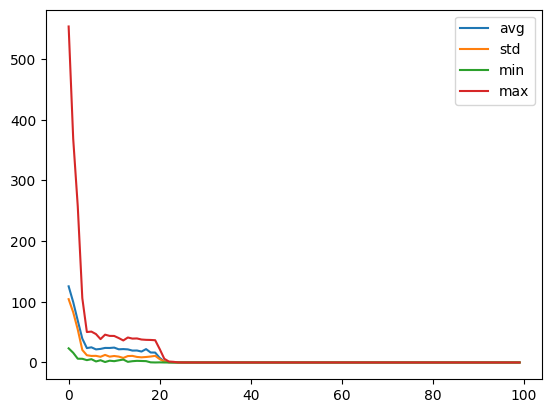

In [ ]:
main()